# About
- goal is to include a functional response to modify the energy intake parameter $a$ over time
- may possible also modify the exponent of the energy terms as it has been shown to stray away from $\frac{3}{4}$ ($am^\frac{3}{4}$) under non-ideal conditions by Samraat's dimenstionality paper.

aim for: 
- $$\frac{dm}{dt} = F_ram^\frac{3}{4} - bm - cm^\rho 
\text{ -->Where: } F_r = \text{Functional Response}$$

ABOVE IS A MISUNDERSTANDING BY ME

acutally need to modify the whole $am^\frac{3}{4}$ term, where the exponent will scale like Samraat's dimensionality paper.

# Equations
## Mass
- $\alpha$ = age of maturity
- $m_\alpha$ = size at maturity
- $a$ = growth rate
- $b$ = maintenace cost per cell
- $c$ = reproduction cost per cell
<p>&nbsp;</p>

Before reproduction is factored in:
<p>&nbsp;</p> 
\begin{align}
        \frac{dm}{dt} &= am^\frac{3}{4} - bm  &m < m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm^\rho  &m > m_\alpha \\
\end{align}

## Reproduction
##### Base Equation 
##### Variable Meanings
- $R_0$ = Lifetime production of offspring
- $cm$ = Reproductive allocation
- $m$ =  mass
- $\rho$ = reproductive scaling
- $h(t)$ = efficiency term representing a declining efficiency , i.e. reproductive senesence.
- $l_t$ = Probability of survival
- $L_t / L_\alpha$ = scaling factor for mature population
- $\alpha$ = feasible ages of first breeding 
- $b_t$ = effective energy allocated to reproduction
\begin{align}
    R_0 &= \int_\alpha^\infty l_t b_t dt\\
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
\end{align}

##### Derived Equation
##### Variable Meanings
- $L_\alpha$ = Mortality before maturity
- $Z$ = Adult instantaneous mortality rate (m > $m_\alpha$)
- $\kappa$ = rate parameter, controles reproductive senesence rate
- $Z(t)$ = instantaneous mortality rate at age t
\begin{align}
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
    &= \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} L_\alpha e^{Z(t-\alpha)}dt\\
    &= L_\alpha \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} e^{Z(t-\alpha)}dt\\
        &= cL_\alpha \int_\alpha^\infty m^\rho (t)^\rho e^{-(\kappa Z)(t-\alpha)}dt\\
    &= c\int_0^\alpha e^{-Z(t)} dt  \int_\alpha^\infty m(t)^\rho e^{-(\kappa +Z)(t-\alpha)}dt\\
\end{align}


$$
\text{Cumulative Reproduction} = \\
\int_0^\alpha \text{juvenile mortality  } dt \int_\alpha^\infty \text{reproductive cost}^\rho \times\text{mortality } dt\\
\frac{dm}{dt} = \text{energy supply} - \text{maintance cost} - \text{reproductive cost}^\rho
$$

# Functional Response
- $a$ = attack rate
- $h$ = handling time
- $X_r$ = Resource Density
- $q$ = dimensionless exponent that transitions between full Type II ($q = 0$) and Full Type III($q = 1$) response
\begin{align}
    \frac{a X_r^{q+1}}{1 + h a X_r^{q+1}}
\end{align}

## Concerns with Implimentation
- how to define the range of the response
- how do things really fluctuate with time
- where to fluctuate around (around maximum ingestion rate (1/h)? by how much to fluctuate)
- can it be used when part of a is to do with resting metabolic rate?
- how to define the parameters (a, h in a general manner?

# Functions

## Functional Response
- A functional response to be included with the energy intake parameters

In [1]:
# def FuncResp(Xr, a, h, q = 0):
    
#     """
#     The equation for the more general Type II functional response curve.
#     Need an argument params which is a dictionary containing the parameter values.
#     This dictionary is made using lmfit.parameters().
#     Includes a dimensionless parameter `q` which is used to account for a small lag phase at 
#     the start of the curve and is a type III response at q = 1.

#     Arguments:
#         a {float} -- Attack rate
#         h {float} -- handling time
#         q {float} -- dimensionless exponent
#         Xr {float} -- Resource Density
#         data {float} -- the data that Xr is compared against if minimising the difference 
#                         using lmfit.minimize()
    
#     Returns:
#         {float} -- Consumption rate
#     """
#     top = a * (Xr ** (q + 1))
#     bot = 1 + (h * a * (Xr ** (q + 1)))
#     C = top / bot
#     return C

## Lifetime Reproduction and Mass

### Incorrect method with direct implimentation of Func Resp

In [2]:
# import scipy as sc
# from scipy import exp
# from scipy import integrate
# from math import floor
# import matplotlib.pyplot as plt



# def L(t, k = 0.01):
#     """
#         Calculates lifetime reproductive output of an organism, 
#         as described in Charnov et al. 2001.

#         Arguments:
#             t {int} -- time
#             k {float} -- reproduction senescence
#         Returns:
#             {float} -- lifetime reproductive output
#     """
#     return exp(-k*t)
# def dRmdt(mR0, t, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06, k = 0.01, seasonal = True): 
#     """
#     A function to simulate change in mass and reproductive output for a time point.  
#     Function designed with the intention of beign integrated.
    
#         Arguments:
#         t {float} -- time
#         mR0 {float} -- array with mass (g) and reproduction at start of time step 
#         alpha {float} -- asymtotic mass (g)
#         M {float} -- asymptotic mass
#         a {float} -- growth rate (UNITS?)
#         b {float} -- maintenace cost per cell ## found in function
#         c {float} -- reproductive cost (UNITS?)}
#         rho {float} -- scaling factor of reproduction (UNITS?)
#         k
#         Z {float} -- ## found in function
        
#     Returns:
#         {dict} -- 
#             dmdt --rate of change of mass in grams^1/4 per day (g^1/4 d^-1) at time t
#                 NOTE:  integration of dmdt will give mass at t
#             Rt -- reproductive output at time t in terms of mass 
#                 NOTE: integration of Rt gives total Reproductive output for the bounds of the integral
#     """
#     # predefine outputs 
                
#     m = mR0[0] 
#     R = mR0[1]
#     b = a/(M**0.25)
#     Z = 2/alpha
#     Q = L(t-alpha, k)
    
#     # seasonality
#     # turn t into an option to vary supply
#     # adjust `t` if over 1 year to within one year
#     if t > 365:
#         t_temp = t - (365 * floor(t/365))
#     else:
#         t_temp = t
#     x = t_temp/365 # as a percentage of the year to mimic a full year of seasonality
#     # recalculate `a` with seasonality
#     #-->(renamed to avoid futher changing the value for further integration iteratons)
#     # not using functional response 
# #-->and just scaling `a` over time with average of 0.5
# #     a_temp = (0.75*a) +(0.25*sc.sin(x)) # vary around from 50 - 100% of `a` with mean 75% a * (0.75+(0.25*sc.sin(x)))
# # using functional response
# # `a` thought of as the max possible value for Xr and vary around that
#     a_temp = FuncResp(Xr = a * (1+(0.5*sc.sin(x))), a = 4, h = 1/a, q = 0)
#     if seasonal == False:
#         a_temp = a
    
#     # conditional tree dependant on `alpha` 
#     if t < 0:
#         return "ERROR: time < 0"
#     if t < alpha:
#         dmdt = (a_temp * (m**0.75)) - (b * m)
#         R = 0
#     elif t >= alpha:
#         dmdt = (a_temp * (m**0.75)) - (b * m) - (c * (m**rho))
# #         R = Q*c * m**rho
#         R = (c * m**rho) * exp(-(k + Z) * (t - alpha))
#     if m + dmdt < 0: # forces the value to 0 if it would go below to avoid -ve values
#         dmdt = -m
    
#     return sc.array([dmdt, R])
# #     return dict["dmdt" : dmdt, "Reproduciton" : R]


### Method based on figures from Samraat's 2012 paper
#### bi-modal high/low resource function

In [3]:
import scipy as sc
from scipy import exp
from scipy import integrate
from math import floor
import matplotlib.pyplot as plt



def L(t, k = 0.01):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time
            k {float} -- reproductive senescence
        Returns:
            {float} -- lifetime reproductive output
    """
    return exp(-k*t)
def dRmdt(mR0, t, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06, k = 0.01, resource = None): 
    """
    A function to simulate change in mass and reproductive output for a time point.  
    Function designed with the intention of beign integrated.
    
        Arguments:
        t {float} -- time
        mR0 {float} -- array with mass (g) and reproduction at start of time step 
        alpha {float} -- asymtotic mass (g)
        M {float} -- asymptotic mass
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell ## found in function
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        k {float} -- reproductive senescence
        Z {float} -- ## found in function
        
    Returns:
        {dict} -- 
            dmdt --rate of change of mass in grams^1/4 per day (g^1/4 d^-1) at time t
                NOTE:  integration of dmdt will give mass at t
            Rt -- reproductive output at time t in terms of mass 
                NOTE: integration of Rt gives total Reproductive output for the bounds of the integral
    """
    # predefine outputs 
                
    m = mR0[0] 
    R = mR0[1]
    b = (a/(M**0.25))
    Z = 2/alpha
    Q = L(t-alpha, k)
#     print(b)
    # resource density - since fish are 3D, will be using those values from pawar et al 2012
        #for consumption rate
    if resource == "low":
        res_dens = a * (m**1.06)
    elif resource == "high":
        res_dens = a * (m**1.0)
    elif resource == None:
        res_dens = a * (m**0.75)
    else:
        return "Please specify resource density"
    # conditional tree dependant on `alpha` 
    if t < 0:
        return "ERROR: time < 0"
    if t < alpha:
        dmdt = (res_dens) - (b * m)
        R = 0
    elif t >= alpha:
        dmdt = (res_dens) - (b * m) - (c * (m**rho))
#         R = Q*c * m**rho
        R = (c * m**rho) * exp(-(k + Z) * (t - alpha))
    # To set mass to 0 in cases where it goes below 0 if fish is shrinking. 
    # Of course not possible in real life but can happen with righ parameters.
    if m + dmdt < 0: 
        dmdt = -m
    
    return sc.array([dmdt, R])


# Implimentation (Single values)

## Code

In [4]:
## imports
import scipy as sc
from scipy import integrate

days = 300 #  time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
b =  0 # no need to calculate right now since i do it in function,could be done here to save time
c = 1
a = 2.15
## definition of various `a`'s under optimal condtions with 3/4 scaling and samraats paper.
# optimal `a`
aOpt = (2.4867* 10**-5) *24*60*60 # converted to days
# abundant resource 3D - Pawar 2012 fig 3
aHigh = (10**-4.7)*24*60*60
# scarce resource 3D - Pawar 2012 fig 3
aLow = (10**-5.2)*24*60*60

# reproductive cost 
M =  25000
alpha = 200 # age of maturation (days)
# rho = 0.68#0.23 # reproductive scaling parameter
rho = 0.5
k =  0.01

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
######## Under Optimal conditions ########
resource = None
params = (alpha, M, aOpt, c, rho, k, resource) # tuple for integration arguments

# integration
mR = integrate.odeint(dRmdt, mR0, t, args = params)
massOpt = mR[:, 0]
reproOpt = mR[:, 1]

######## Under abundant conditions ########
resource = "high"
params = (alpha, M, aHigh, c, rho, k, resource) # tuple for integration arguments

# integration
mR = integrate.odeint(dRmdt, mR0, t, args = params)
massHigh = mR[:, 0]
reproHigh = mR[:, 1]

######## Under scarce conditions ########
resource = "low"
params = (alpha, M, aLow, c, rho, k, resource) # tuple for integration arguments

# integration
mR = integrate.odeint(dRmdt, mR0, t, args = params)
massLow = mR[:, 0]
reproLow = mR[:, 1]


# massOpt


/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [5]:
# massHigh

In [6]:
# massLow

## Plots

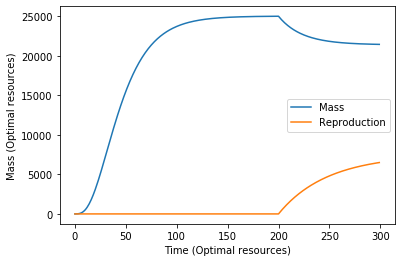

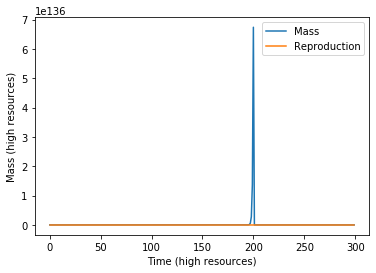

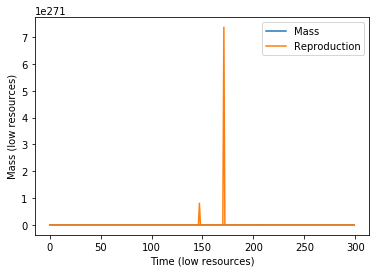

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, massOpt, label = "Mass")
plt.plot(t, reproOpt, label = "Reproduction")
plt.xlabel("Time (Optimal resources)")
plt.ylabel("Mass (Optimal resources)")
plt.legend()
plt.show()
plt.figure()
plt.plot(t, massHigh, label = "Mass")
plt.plot(t, reproHigh, label =  "Reproduction")
plt.xlabel("Time (high resources)")
plt.ylabel("Mass (high resources)")
plt.legend()
plt.show()
plt.figure()
# plt.plot(t, sc.log(massLow), label = "Mass (logged)")
plt.plot(t, massLow, label = "Mass")
plt.plot(t, reproLow, label = "Reproduction")
plt.xlabel("Time (low resources)")
plt.ylabel("Mass (low resources)")
plt.legend()
plt.show()

# -------Ignore below here ----------

In [8]:
to break the script

SyntaxError: invalid syntax (<ipython-input-8-2ce4af8f0a92>, line 1)

# Exploring $\rho$ Values
- looking at what values `sc.integrate.odeint` can handle
- looking at how behaviour of the model changes with just changes in $\rho$

## Code

In [ ]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days)
rho = .687 # reproductive scaling parameter | placeholder for this exploration
k = 0.01

# define rho values to interate over
rhoVals = sc.linspace(0, 2, 20)

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for rho in rhoVals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(rho)] = mR[:, 0]
    repro[str(rho)] = mR[:, 1]

# exploring output
print(mass.keys())
mass["2.0"][-50:]



## Plots

In [ ]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
alpha_annotation  = "alpha = " + str(alpha)
k_annotation  = "k = " + str(k)
for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying rho values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 300, M_annotation) 
    plt.text(400, 250, a_annotation) 
    plt.text(400, 200, c_annotation) 
    plt.text(400, 150, alpha_annotation) 
    plt.text(400, 100, k_annotation)
# save image
plt.savefig("../results/rhoFunc_exploration.png", dpi = 200)


## Notes:
- `nan` values start to appear around $\rho = 0.7$ and on in both mass and reproduction

# Exploring $\alpha$ Values

## Code

In [ ]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
alphaVals = sc.linspace(0, 1000, 20) # values every 50

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for alpha in alphaVals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(alpha)] = mR[:, 0]
    repro[str(alpha)] = mR[:, 1]

# exploring output
mass["789.473684211"][600:800]

## Plots

In [ ]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
rho_annotation  = "rho = " + str(rho)
k_annotation  = "k = " + str(k)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying alpha values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 250, M_annotation) 
    plt.text(400, 200, a_annotation) 
    plt.text(400, 150, c_annotation) 
    plt.text(400, 100, rho_annotation) 
    plt.text(400, 50, k_annotation)
# save image
plt.savefig("../results/alphaFunc_exploration.png", dpi = 200)

## Notes
- `nan` not produced - range(0 -1000)
- seems that if `nan` is produced an increase in $\alpha$ alleviates the problem.  
    - i.e. it does play a role in what is causing `nan` production

# Exploring $c$ Values

## Code

In [ ]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
c_Vals = sc.linspace(0, 0.4, 40) 

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for c in c_Vals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(c)] = mR[:, 0]
    repro[str(c)] = mR[:, 1]

# exploring output
print(mass.keys())
mass["0.297435897436"][600:800]

## Plots

In [ ]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
alpha_annotation  = "alpha = " + str(alpha)
rho_annotation  = "rho = " + str(rho)
k_annotation  = "k = " + str(k)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 4})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying c values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 300, M_annotation) 
    plt.text(400, 250, a_annotation) 
    plt.text(400, 200, alpha_annotation) 
    plt.text(400, 150, rho_annotation) 
    plt.text(400, 100, k_annotation)
# save image
plt.savefig("../results/cFunc_exploration.png", dpi = 200)

## Notes
- `nan` produced from 0.3 and greater - range(0 - 3)
- `nan` produced from 0.2974... and greater - range(0 - 0.4) 
- `nan` produced from 0.194 and greater - manual investigation

- tiny increases in `a` give a lot of freedom for `c` to increase without producing `nan`

# Exploring $\kappa$ Values

## Code

In [ ]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
k_Vals = sc.linspace(0, 1, 20) 

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for k in k_Vals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(k)] = mR[:, 0]
    repro[str(k)] = mR[:, 1]

# exploring output
len(mass.keys())

## Plots

In [ ]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
rho_annotation  = "rho = " + str(rho)
alpha_annotation  = "alpha = " + str(alpha)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying k values - colour the same for same values in repro and m")
    # extra details for graph about the fixed values used for the simulation
    plt.text(600, 300, M_annotation) 
    plt.text(600, 250, a_annotation) 
    plt.text(600, 200, c_annotation) 
    plt.text(600, 150, rho_annotation) 
    plt.text(600, 100, alpha_annotation)
# save image
plt.savefig("../results/kappaFunc_exploration.png", dpi = 200)

# Exploring Supply / $a$ Exponents

## Modified Function

In [ ]:
from scipy import exp 
def dRmdt2(mR0, t, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06, k = 0.01, x = 0.75): 
    """
    A function to simulate change in mass and reproductive output for a time point.  
    Function designed with the intention of beign integrated.
    
        Arguments:
        t {float} -- time
        mR0 {float} -- array with mass (g) and reproduction at start of time step 
        alpha {float} -- asymtotic mass (g)
        M {float} -- asymptotic mass
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell ## found in function
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        k
        Z {float} -- ## found in function
        
    Returns:
        {dict} -- 
            dmdt --rate of change of mass in grams^1/4 per day (g^1/4 d^-1) at time t
                NOTE:  integration of dmdt will give mass at t
            Rt -- reproductive output at time t in terms of mass 
                NOTE: integration of Rt gives total Reproductive output for the bounds of the integral
    """
    # predefine outputs 
                
    m = mR0[0] 
    R = mR0[1]
    b = a/(M**0.25)
    Z = 2/alpha
#     Q = L(t-alpha, k)
    
    # conditional tree dependant on `alpha`
    if t < 0:
        return "ERROR: time < 0"
    if t < alpha:
        dmdt = (a * (m**x)) - (b * m)
        R = 0
    elif t >= alpha:
        
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
#         R = Q*c * m**rho
        R = (c * m**rho) * exp(-(k + Z) * (t - alpha))
    if m + dmdt < 0: # still not 100% sure why `-m`
        dmdt = -m
    
    return sc.array([dmdt, R])
#     return dict["dmdt" : dmdt, "Reproduciton" : R]

## Code

In [ ]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01
x = 0.75 # exponent affecting supply
# define rho values to interate over
x_Vals = sc.linspace(0.75, 0.85, 50) 

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k, x) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for x in x_Vals:
    mR = integrate.odeint(dRmdt2, mR0, t, args = (alpha, M, a, c, rho, k, x))
    mass[str(x)] = mR[:, 0]
    repro[str(x)] = mR[:, 1]

# exploring output
len(mass.keys())

## Plots

In [ ]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
rho_annotation  = "rho = " + str(rho)
alpha_annotation  = "alpha = " + str(alpha)
kappa_annotation  = "Kappa = " + str(k)
for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
#     plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 3})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying supply exponents - colour the same for same values in repro and m")
    # extra details for graph about the fixed values used for the simulation
    plt.text(400, 250, M_annotation) 
    plt.text(400, 200, a_annotation) 
    plt.text(400, 150, c_annotation) 
    plt.text(400, 100, rho_annotation) 
    plt.text(400, 50, alpha_annotation)
# save image
plt.savefig("../results/supplyFunc_exploration.png", dpi = 200)

## Notes

# General Notes:
# Factors affecting growth
- see kohler 1964![kohler 1964](notebook_images/kohler_1964.png)

- temperature is a big factor affecting growth rate within species (torno et al 2019)

# Messing

In [ ]:
from scipy import sin
import scipy as sc
import matplotlib.pyplot as plt
def test(x, a = 1, b = 1, c = 1, exponent = 0.75):
    return (a*x**exponent)* (b - (c))

a = 1
line = sc.linspace(0, 15, 500)
days = sc.linspace(0, 500, 500)
var = []
for i, j in enumerate(line):
    var.append(test(j, b = 1.5,c = .5, exponent = 1.6))

plt.figure()
plt.plot(line, var)
plt.show()
# max(var)
# min(var)
# enumerate(line)

In [ ]:
round(line[2],2)


In [ ]:
round(4.5555,1)

In [ ]:
t = 733
if t > 365:
    t_temp = t - (365 * floor(t/365))
else:
    t_temp = t
x = t_temp/365 # as a percentage of the year to mimic a full year of seasonality
a = a * (1+(0.5*sc.sin(x)))
plt.figure()
plt.plot()

In [ ]:
365*2